# Introduction to scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the Scikit-learn library

What we're going to cover:

In [72]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions in our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting all together"]

In [73]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-learn workflow

In [74]:
# 1. Get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [76]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [78]:
clf.fit(X_train, y_train);

In [79]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [80]:
# make a prediction
#y_label = clf.predict(np.array([0, 2, 3, 4])) # da error pq tiene que tener el mismo shape que X_train

In [81]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [82]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [83]:
# 4. Evaluate the model on the training data and the test data
clf.score(X_train, y_train)

1.0

In [84]:
clf.score(X_test, y_test)

0.8524590163934426

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [86]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [87]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [88]:
# 5. Improve the model
# Try different amounts of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [89]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [90]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (ussually "X" & "y")
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (also called feature encoding)

In [91]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [92]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [93]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numeric

In [95]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [96]:
len(car_sales)

1000

In [97]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [98]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [104]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

# Da error porque hay que convertir los datos a numericos
model = RandomForestRegressor()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [105]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [106]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [107]:
dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [108]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [109]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some values (Also known as imputation)
2. Remove the samples with missing data altogether

In [110]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [111]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [112]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [113]:
# Let's try to convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5000 stored elements and shape (1000, 17)>

### Option 1: Fill missing data with pandas (no hace falta pq el OneHotencoder ahora maneja NaN)

In [114]:
# Hay q reasignar cada columna si queremos mantener los cambios
# Fill the "Make" column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

#Fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the "Doors" column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [115]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)

In [116]:
# Let's try to convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

### Option 2: Fill missing values with Scikit-learn

In [117]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head

<bound method NDFrame.head of        Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]>

In [118]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [119]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [120]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split into train and test data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Filled train set and test set values separately (Also it works if I fill the values altogether)
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [122]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [123]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [124]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [125]:
# Check length of transformed data (filled and one hot encoded) vs length of original data
len(transformed_X_train.toarray()) + len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

### Note:
The 50 values less in the transformed data is because we dropped the rows (50 total) with missing values in the Price column

### Choosing the right estimator/algorithm for your problem
Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators
* Classification problems - predicting a category (heart disease or not)
    * Sometimes you'll see clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and loking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning
map: https://scikit-learn.org/stable/machine_learning_map.html

## 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset.

In [126]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [127]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [128]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
#housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [131]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440125

What if `Ridge` didn't work or the score  didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble model is a combination of smaller estimators to try and make better than one estimator)

In [132]:
# Import algorithm/estimator
from sklearn.ensemble import HistGradientBoostingRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.834709142444373

In [133]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score
model.score(X_test, y_test)

0.806652667101436

## 2.2 Choosing an estimator for a classification problem

In [134]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [135]:
len(heart_disease)

303

Consulting the map and it says to try `Linear SVC`

In [136]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [137]:
# If Linear SVC don't work
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, used deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In [138]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [139]:
# Used a train model to make predictions
clf.predict(X_test) # The predictions have to be in the X_test shape

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [140]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [141]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [142]:
clf.score(X_test, y_test)

0.8524590163934426

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [144]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [145]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for a regression model

In [146]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [147]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [148]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [149]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [150]:
len(y_preds)

4128

In [151]:
len(y_test)

4128

In [152]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32656738464147306

## 4. Evaluating a machine learning model
Three ways to evaluate Scikit-learn models/estimators:
1. Estimator's build in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [153]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [154]:
clf.score(X_train, y_train)

1.0

In [155]:
# The highest value for te .score() method is 1.0 and the lowest is 0.0
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score()` on our regression problem

In [156]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [157]:
# The default score() evaluation metric is r_squared for regression algorithms.
model.score(X_test, y_test)

0.806652667101436

### 4.2 Evaluating a model using the `scoring` parameter

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [159]:
clf.score(X_test, y_test)

0.8524590163934426

In [160]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [161]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [162]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [163]:
# Scoring parameter set to None as default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [165]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [166]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (TPR) versus a model false positive rate (FPR).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [169]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [170]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

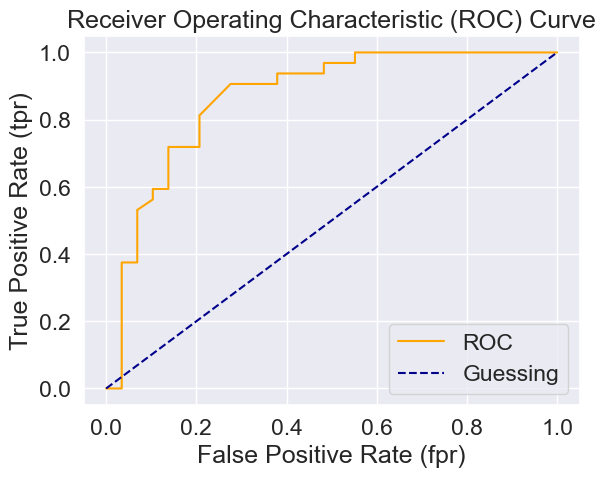

In [171]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr)
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predicting power (baseline)
    plt.plot([0, 1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [172]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

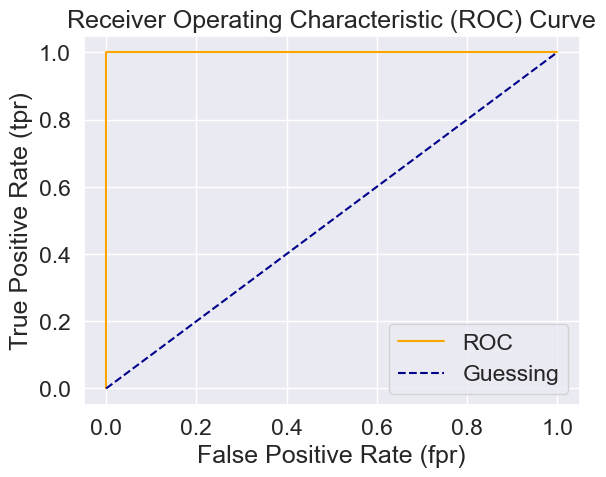

In [173]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [174]:
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

A confussion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [175]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [176]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [177]:
# Forma de instalar algo en nuestro env de conda desde jupyter notebook
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

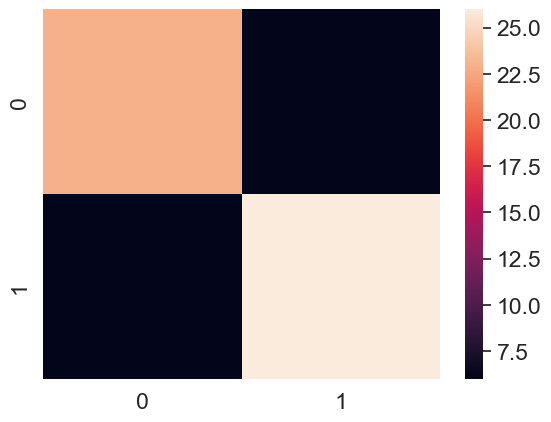

In [179]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-learn

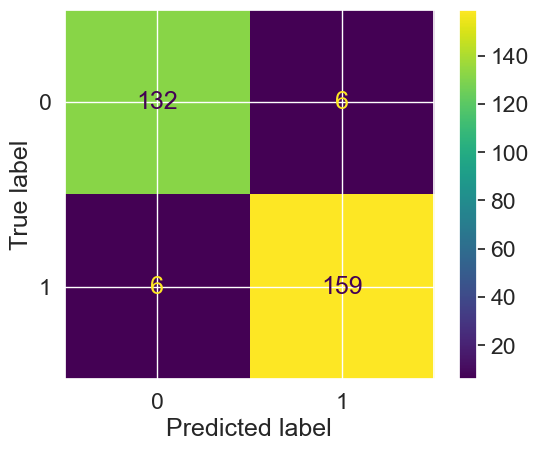

In [181]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

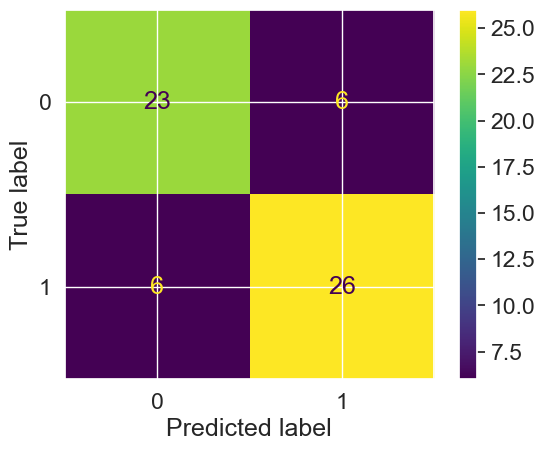

In [183]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

### Classification report

In [184]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [186]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\drina\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\drina\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\drina\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for more precision.
* If false negative predictions are worse than false positives, aim for more recall.
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

The ones we're going to cover:

1. R^2 (pronounced r squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [187]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [188]:
model.score(X_test, y_test)

0.806652667101436

In [190]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [191]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [192]:
y_test.mean()

np.float64(2.0550030959302323)

In [193]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [194]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [195]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

0.0

In [196]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute difference between predictions and actual labels.

It gives you an idea of how wrong your model predictions are.

In [197]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32656738464147306

In [198]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df[:10]

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [201]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

np.float64(0.32656738464147306)

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [202]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.25336408094921037

In [204]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [206]:
# Calculated MSE by hand
squared = np.square(df["differences"])
squared.mean()

np.float64(0.25336408094921037)

In [210]:
df_large_error = df.copy()
df_large_error.loc[df_large_error.index[0], "squared_differences"] = 16

In [211]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [212]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

np.float64(0.25723998075298943)

In [213]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.219830,-0.413170,0.170709
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [214]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

np.float64(0.7333102979585939)

### 4.2.3 Finally using the `scoring` parameter

In [215]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [216]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [217]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [218]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [220]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [221]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [222]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [223]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [224]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being used in a regression problem

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor();

In [232]:
np.random.seed(42)

# Cross-validation r_squared or coefficiente of determination
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r_2)

np.float64(0.6545660727379677)

In [233]:
cv_r2

array([0.62156808, 0.72076221, 0.62136792])

In [237]:
# Mean Squared Error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.4613849035890462)

In [239]:
cv_mse

array([-0.5101746 , -0.33368417, -0.54029594])

In [238]:
# Mean Absolute Error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-0.48352491831879857)

In [240]:
cv_mae

array([-0.51745516, -0.4267802 , -0.50633939])

### 4.3 Using different evaluation metrics as Scikit-learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use de `sklearn.metrics` module

In [249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup the seed
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the model using evaluation functions
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%") 
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [252]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup the seed
np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create the model
model = RandomForestRegressor()

#Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

#Evaluate the model using evaluation functions
print("Regression metrics on the test set:")
print(f"R2 score: {r2_score(y_test, y_preds)}") 
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set:
R2 score: 0.806652667101436
MAE: 0.32656738464147306
MSE: 0.25336408094921037


## 5. Improving the model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

* Parameters = model find these patterns in our data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [263]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [264]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make three sets, training, validation and test.

In [265]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [266]:
def clf_evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification model.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [272]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier model on validation set
baseline_metrics = clf_evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [270]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [274]:
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = clf_evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [278]:
np.random.seed(42)

# Create a 2nd classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make baseline predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the classifier model on validation set
clf_2_metrics = clf_evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 82.22
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [283]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": [None, "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10, # number of models to try
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tot

In [284]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [286]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions 
rs_metrics = clf_evaluate_preds(y_test, rs_y_preds)

Acc: 83.61
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### 5.3 Hyperparameter tuning with GridSearchCV

In [287]:
grid

{'n_estimators': [100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': [None, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [288]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': [None, 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [2, 4]}

In [290]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid_2,
                      cv = 5,
                      verbose = 2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, 

In [291]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [296]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = clf_evaluate_preds(y_test, gs_y_preds)

Acc: 80.33
Precision: 0.75
Recall: 0.86
F1 score: 0.80


Let's compare our different models all together.

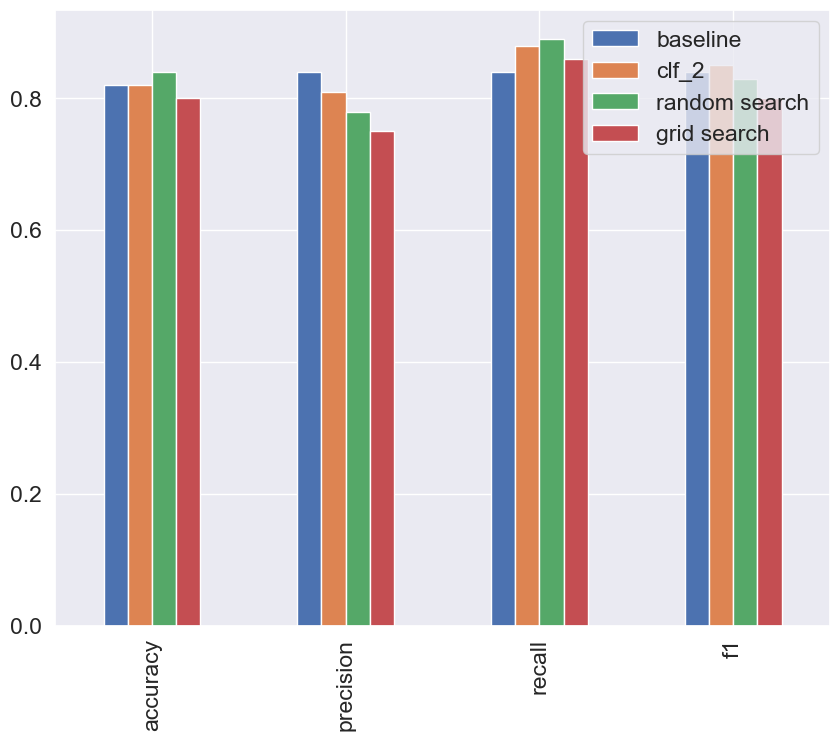

In [300]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` module.
2. With `joblib` module.

**Pickle**

In [301]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_classifier_1.pkl", "wb"))

In [303]:
# Load a saved model
loaded_pickle_model = pickle.load(open("models/gs_random_forest_classifier_1.pkl", "rb"))

In [304]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
clf_evaluate_preds(y_test, pickle_y_preds)

Acc: 80.33
Precision: 0.75
Recall: 0.86
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

**Joblib**

In [305]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_classifier_1.joblib")

['gs_random_forest_classifier_1.joblib']

In [307]:
# Import a saved joblib module
loaded_joblib_model = load(filename="models/gs_random_forest_classifier_1.joblib")

In [308]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
clf_evaluate_preds(y_test, joblib_y_preds)

Acc: 80.33
Precision: 0.75
Recall: 0.86
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

## Putting it all together!

In [7]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [8]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [9]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [11]:
# Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data_car = pd.read_csv("data/car-sales-extended-missing-data.csv")
data_car.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

num_feature = ["Odometer (KM)"]
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", num_transformer, num_feature)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split the data
X = data_car.drop("Price", axis=1)
y = data_car["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [13]:
# Use GridSearchCV with our regression Pipeline

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...Regressor())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__max_depth': [None, 5], 'model__max_features': ['sqrt'], 'model__min_samples_split': [2, 4], 'model__n_estimators': [100, 1000], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for eac

In [14]:
gs_model.score(X_test, y_test)

0.2848784564026805